In [1]:
from pvlib import location
from pvlib import irradiance
import pandas as pd
from matplotlib import pyplot as plt
from pvlib import tracking

In [11]:


# For this example, we will be using Golden, Colorado
tz = 'US/Central'
lat, lon = 45.5025, -92.9083

# Create location object to store lat, lon, timezone
site = location.Location(lat, lon, tz=tz)


In [17]:
date = '06-20-2020'

times = pd.date_range(date, freq='10min', periods=6*24, tz=site.tz)

clearsky = site.get_clearsky(times)


In [18]:

solpos= site.get_solarposition(times=times)

In [24]:
solpos

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2020-06-20 00:00:00-05:00,109.077822,109.077822,-19.077822,-19.077822,342.237854,-1.621969
2020-06-20 00:10:00-05:00,109.577612,109.577612,-19.577612,-19.577612,344.609814,-1.623492
2020-06-20 00:20:00-05:00,110.007149,110.007149,-20.007149,-20.007149,347.004065,-1.625016
2020-06-20 00:30:00-05:00,110.365067,110.365067,-20.365067,-20.365067,349.417605,-1.626539
2020-06-20 00:40:00-05:00,110.650204,110.650204,-20.650204,-20.650204,351.847176,-1.628062
...,...,...,...,...,...,...
2020-06-20 23:10:00-05:00,105.564244,105.564244,-15.564244,-15.564244,330.748609,-1.833571
2020-06-20 23:20:00-05:00,106.390493,106.390493,-16.390493,-16.390493,332.973947,-1.835092
2020-06-20 23:30:00-05:00,107.155684,107.155684,-17.155684,-17.155684,335.231978,-1.836613
2020-06-20 23:40:00-05:00,107.857750,107.857750,-17.857750,-17.857750,337.521292,-1.838133


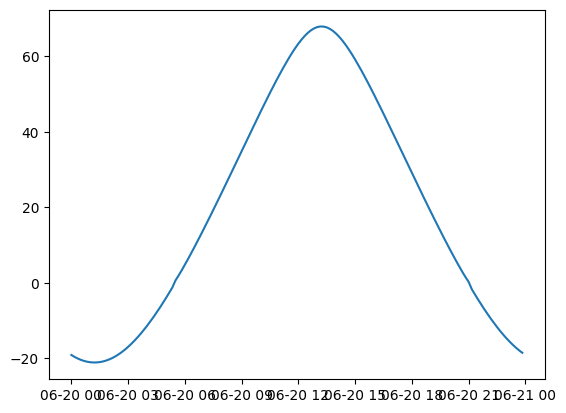

In [25]:
plt.plot(solpos['apparent_elevation'])

In [20]:
tracking_angles = tracking.singleaxis(
    apparent_zenith=solpos['apparent_zenith'],
    apparent_azimuth=solpos['azimuth'],
    axis_tilt=0,
    axis_azimuth=180,
    max_angle=50,
    backtrack=True,  # for true-tracking
    gcr=0.372)  # irrelevant for true-tracking

In [22]:
tracking_angles

,tracker_theta,aoi,surface_azimuth,surface_tilt
2020-06-20 00:00:00-05:00,NaN,NaN,NaN,NaN
2020-06-20 00:10:00-05:00,NaN,NaN,NaN,NaN
2020-06-20 00:20:00-05:00,NaN,NaN,NaN,NaN
2020-06-20 00:30:00-05:00,NaN,NaN,NaN,NaN
2020-06-20 00:40:00-05:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-06-20 23:10:00-05:00,NaN,NaN,NaN,NaN
2020-06-20 23:20:00-05:00,NaN,NaN,NaN,NaN
2020-06-20 23:30:00-05:00,NaN,NaN,NaN,NaN
2020-06-20 23:40:00-05:00,NaN,NaN,NaN,NaN


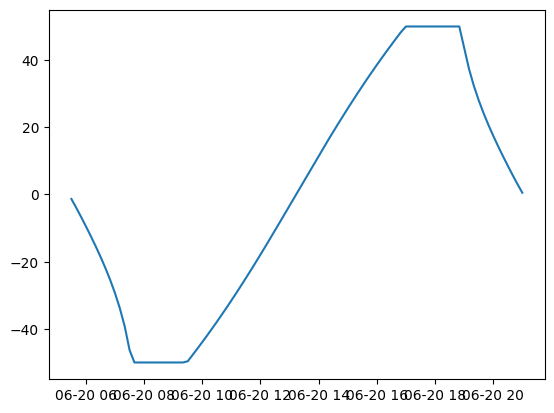

In [23]:
plt.plot(tracking_angles['tracker_theta'])

In [28]:
POA_irradiance_grass = irradiance.get_total_irradiance(
        surface_tilt=tracking_angles['surface_tilt'],
        surface_azimuth=tracking_angles['surface_azimuth'],
        dni=clearsky['dni'],
        ghi=clearsky['ghi'],
        dhi=clearsky['dhi'],
	    albedo = 0.15,
        solar_zenith=solpos['apparent_zenith'],
        solar_azimuth=solpos['azimuth'])
    # Return DataFrame with only GHI and POA


In [29]:
POA_irradiance_sandysoil = irradiance.get_total_irradiance(
        surface_tilt=tracking_angles['surface_tilt'],
        surface_azimuth=tracking_angles['surface_azimuth'],
        dni=clearsky['dni'],
        ghi=clearsky['ghi'],
        dhi=clearsky['dhi'],
	    albedo = 0.25,
        solar_zenith=solpos['apparent_zenith'],
        solar_azimuth=solpos['azimuth'])
    # Return DataFrame with only GHI and POA


In [30]:
POA_irradiance_sandysoil

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2020-06-20 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN
2020-06-20 00:10:00-05:00,NaN,NaN,NaN,NaN,NaN
2020-06-20 00:20:00-05:00,NaN,NaN,NaN,NaN,NaN
2020-06-20 00:30:00-05:00,NaN,NaN,NaN,NaN,NaN
2020-06-20 00:40:00-05:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-20 23:10:00-05:00,NaN,NaN,NaN,NaN,NaN
2020-06-20 23:20:00-05:00,NaN,NaN,NaN,NaN,NaN
2020-06-20 23:30:00-05:00,NaN,NaN,NaN,NaN,NaN
2020-06-20 23:40:00-05:00,NaN,NaN,NaN,NaN,NaN


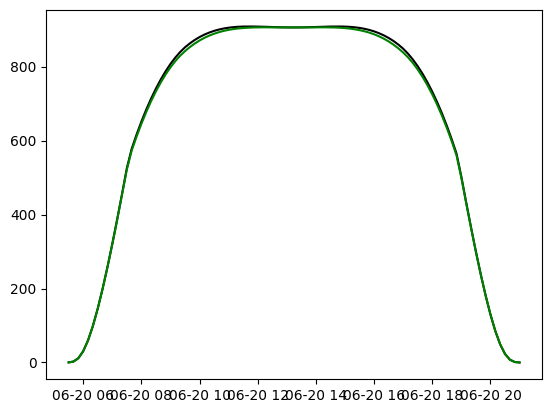

In [33]:
plt.plot(POA_irradiance_sandysoil['poa_global'], 'k')
plt.plot(POA_irradiance_grass['poa_global'], 'g')

Text(0.5, 1.0, 'POA Gain for sandy over grass')

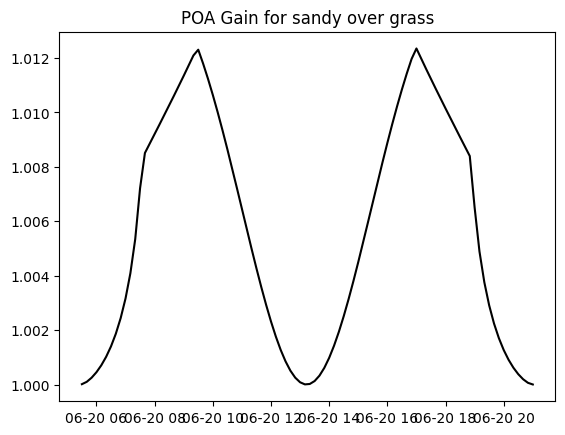

In [43]:
plt.plot(POA_irradiance_sandysoil['poa_global']/POA_irradiance_grass['poa_global'], 'k')
plt.title('POA Gain for sandy over grass')

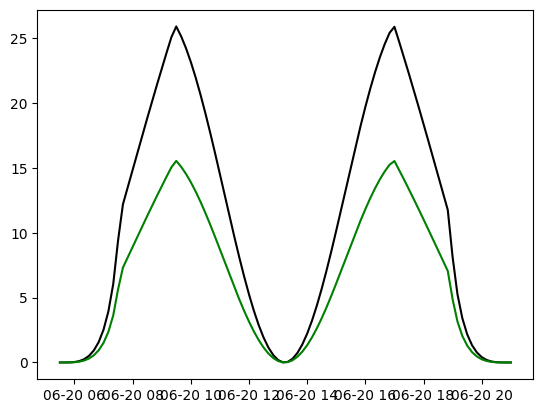

In [37]:
plt.plot(POA_irradiance_sandysoil['poa_ground_diffuse'], 'k')
plt.plot(POA_irradiance_grass['poa_ground_diffuse'], 'g')

Text(0.5, 1.0, 'Ground Diffuse Irradiacne gain, sandy over grass')

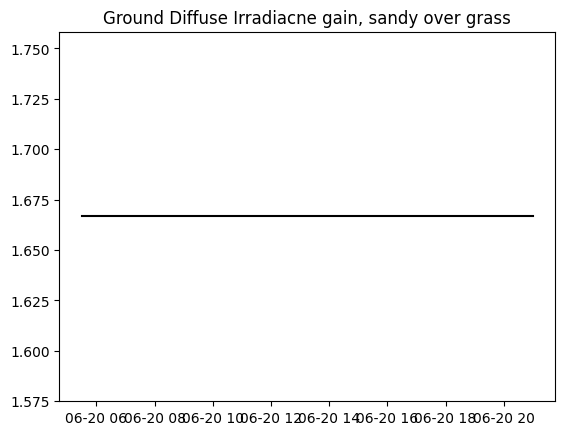

In [44]:
plt.plot(POA_irradiance_sandysoil['poa_ground_diffuse']/POA_irradiance_grass['poa_ground_diffuse'], 'k')
plt.title('Ground Diffuse Irradiacne gain, sandy over grass')

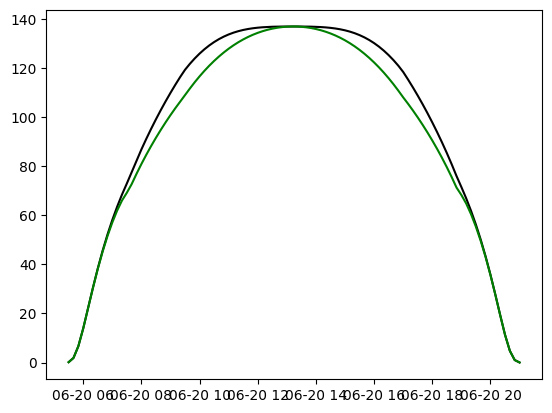

In [40]:
plt.plot(POA_irradiance_sandysoil['poa_diffuse'], 'k')
plt.plot(POA_irradiance_grass['poa_diffuse'], 'g')

Text(0.5, 1.0, 'Gain in poa diffuse irradiance on the module')

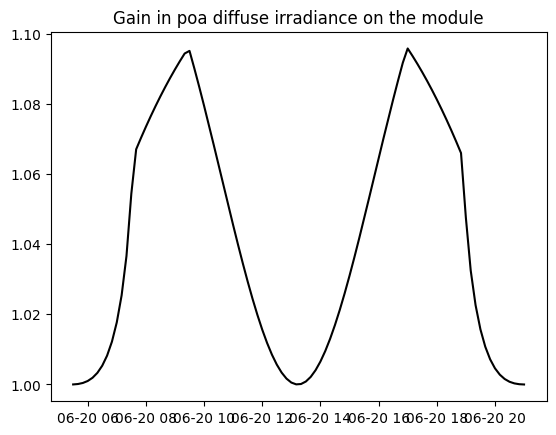

In [45]:
plt.plot(POA_irradiance_sandysoil['poa_diffuse']/POA_irradiance_grass['poa_diffuse'], 'k')
plt.title('Gain in poa diffuse irradiance on the module')